/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/Task1/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


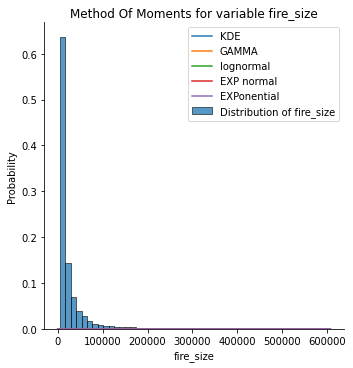

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.7680756297070497, pvalue=1.9917756789526354e-31), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=7.759893844900784, pvalue=1.3145502464340098e-09)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.5972469995696317, pvalue=1.4447207015046017e-17), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=4.639515614934805, pvalue=0)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.6465494262287612, pvalue=6.457941405485101e-21), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=5.240503387293074, pvalue=1.1530010279869884e-10)


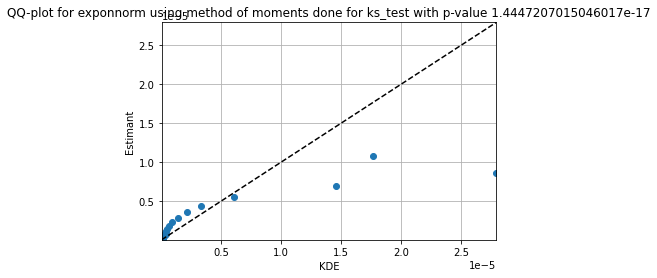

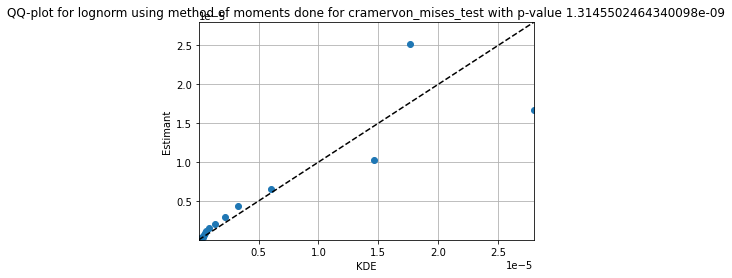

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

fire_size_classes = pd.unique(df['fire_size_class'])
property = 'fire_size'
s_c = 'G'

dfo = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]

def preprocess_missing_weather_data(df):
    df_subsample = df[df['Temp_pre_7'] == -1]
    df_clean = df[df['Temp_pre_7'] != -1]
    mean_weather_data = df_clean.groupby(['state', 'discovery_month'])[weather_columns].mean().reset_index()
    df_subsample.drop(weather_columns, axis=1, inplace=True)
    df_subsample = df_subsample.merge(mean_weather_data)
    df_clean = df_clean.append(df_subsample, ignore_index=True)
    return df_clean

df = preprocess_missing_weather_data(dfo)

df_sampled = df.loc[df['fire_size_class'] == s_c].reset_index()

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()
x = np.linspace(0, max_amount, num=50)
kde_values = kernel(x)

draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

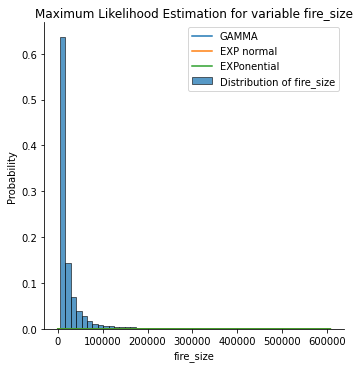

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


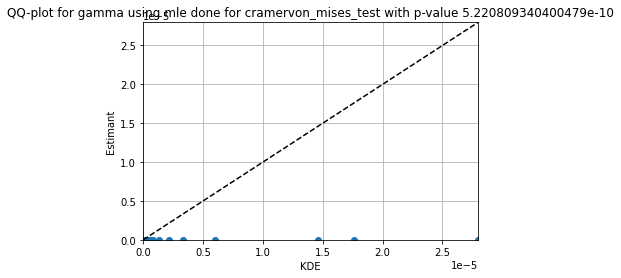

In [2]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

[1.00000000e+00 2.73426687e+04 4.84950955e+04]
[1.00000000e+00 2.73426687e+04 4.84950955e+04]


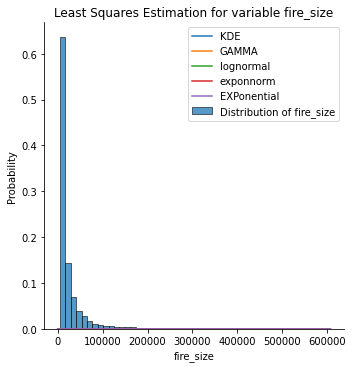

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.8843068780448896, pvalue=3.029480180860553e-47), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=11.551255495623913, pvalue=5.26022669866677e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


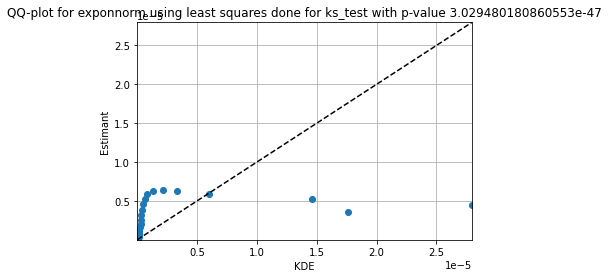

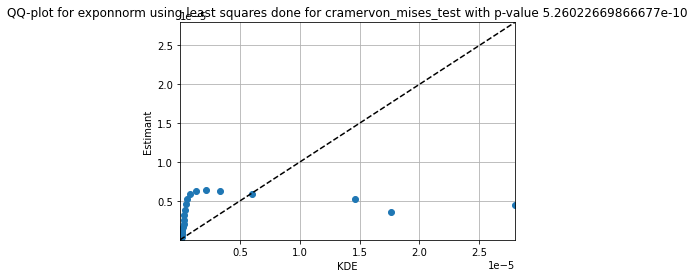

In [3]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

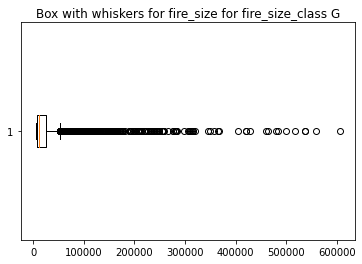

In [4]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()